<a href="https://colab.research.google.com/github/letme-hj/class2021Spring/blob/main/during_class/numpy_during_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy basics

## 1. Creation

In [1]:
import numpy as np
import matplotlib.pyplot as plt # matplotlib이라는 큰 상위 패키지 안에 pyplot이라는 모듈이 있을 것 -> 그걸 plt로

In [2]:
np.empty([2,3], dtype='int') # 2*3의 행렬을 만들어라.

array([[94850959580336,              0,              0],
       [             0,              0,              0]])

In [3]:
np.zeros([2,3]) 

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.arange(0,10,2, dtype='float64') # range와 사용 방법 비슷

array([0., 2., 4., 6., 8.])

In [6]:
np.linspace(0,10,6, dtype=float) # 정말정말 중요!!!!
# 0부터 10까지 6개를 만들어라 (같은 간격으로. linear space로)
# arange와 linspace 만드는 방법 차이점 확인하기~!

# 숫자열 : vector
# 2*3 행렬, 3*2 행렬, ... 행렬은 열벡터(column vector) or 행벡터(row vector)로 이루어져있음 (1*3, 3*1 행렬들 : 벡터)
# "벡터는 행렬이 아니다" (X)



array([ 0.,  2.,  4.,  6.,  8., 10.])

In [ ]:
X = np.array([[1,2,3],[4,5,6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
X.astype(np.float64) # dtype을 바꾸고 싶은 경우

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
np.zeros_like(X) # 원소를 모두 0으로 대체하는 경우 (shape만 유지)

array([[0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.random.normal(d,d,d) # parameters: (평균, 표준편차, 생성할 데이터 개수) -> 데이터 개수 많아질수록 정규분포에 가까워짐

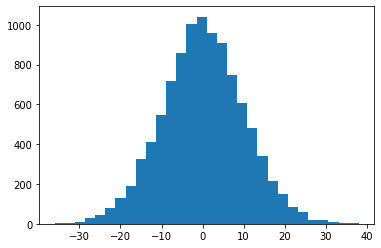

In [19]:
data = np.random.normal(0,10, 10000) # normal: normal distribution의 형태로 만드는 것
# print(data)
plt.hist(data, bins= 30) 
# histogram: python의 basic func으로는 없고, matplotlib.pyplot에서 제공
# bins : 막대 간격(계급의 크기)이 바뀜. (계급의 개수를 결정함)
plt.show()

In [18]:
data.sum()/10000

0.0038126581497758805

## 2. Manipulation

In [20]:
X = np.ones([2, 3, 4]) # 3차원 array n*m*q -> 3차원 이상으로 올라가면 tensor라고 부름 (vector, matrix도 포함함!!)
X # -> 원소의 개수는 2*3*4 개가 됨 (이 원소들로 4*6*1, 2*2*6 등으로 변형 가능 -- reshape)

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [ ]:
Y = X.reshape(-1, 3, 2) # reshape에 -1이 들어가는 건 무슨 의미? "몇개로 나뉘든 상관 없다" (여기서 -1에 해당하는 곳에 들어갈 것은 4가 됨!)
Y

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [23]:
np.ones([6,1,4]) # 3차원

array([[[1., 1., 1., 1.]],

       [[1., 1., 1., 1.]],

       [[1., 1., 1., 1.]],

       [[1., 1., 1., 1.]],

       [[1., 1., 1., 1.]],

       [[1., 1., 1., 1.]]])

In [24]:
np.ones([6,4]) # 2차원 (matrix)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
np.allclose(X.reshape(-1, 3, 2), Y) # 둘이 같은지 확인하는 것

True

In [ ]:
assert np.allclose(X.reshape(-1, 3, 2), Y)

## 3. NumPy I/O

In [ ]:
a = np.random.randint(0, 10, [2, 3])
b = np.random.random([2, 3])
np.savez("test", a, b)

In [ ]:
!ls -al test*

-rw-r--r--  1 jookai  staff     562 Apr  2 00:35 test.npz
-rw-r--r--  1 jookai  staff  123438 Mar 14 23:19 test.wav


In [ ]:
del a, b
%who  # Print all interactive variables

No variables match your requested type.


In [ ]:
npzfiles = np.load("test.npz")
npzfiles.files

['arr_0', 'arr_1']

In [ ]:
npzfiles['arr_0']

array([[1, 5, 2],
       [1, 7, 0]])

In [ ]:
from google.colab import files
uploaded = files.upload()
data = np.loadtxt("regression.csv", delimiter=",", skiprows=1, dtype={'names':("X", "Y"), 'formats':('f', 'f')})
data

Saving regression.csv to regression.csv


In [ ]:
np.savetxt("regression_saved.csv", data, delimiter=",")
!ls -al regression_saved.csv

-rw-r--r-- 1 root root 850 Mar 21 16:33 regression_saved.csv


## 4. Inspecting

In [28]:
arr = np.random.random(100)
arr

array([0.72178318, 0.89768228, 0.47257453, 0.52252436, 0.5783551 ,
       0.07331358, 0.69837196, 0.2682612 , 0.20556822, 0.30059761,
       0.31497021, 0.55525635, 0.78025737, 0.24024315, 0.67189941,
       0.06300967, 0.70709204, 0.07053877, 0.12524003, 0.15173777,
       0.5262083 , 0.1305327 , 0.46390358, 0.96914419, 0.07732335,
       0.46470361, 0.77273001, 0.48995408, 0.89120097, 0.42138424,
       0.61813423, 0.58852664, 0.1635116 , 0.62367628, 0.74259854,
       0.42347884, 0.48566248, 0.39667088, 0.73544261, 0.61125721,
       0.40611428, 0.82149516, 0.99582334, 0.07300585, 0.47111942,
       0.11806151, 0.86640984, 0.49020904, 0.42595938, 0.81492838,
       0.8418907 , 0.49285293, 0.6064881 , 0.81902629, 0.27180303,
       0.48222082, 0.9849506 , 0.17609613, 0.45219708, 0.70035781,
       0.70951216, 0.78481283, 0.17579233, 0.8402146 , 0.54981003,
       0.68446402, 0.45531254, 0.84180182, 0.91510715, 0.45202745,
       0.91840942, 0.61005702, 0.83944982, 0.23858405, 0.22122

In [37]:
arr = np.random.random([5,2,3])
arr

array([[[0.31064297, 0.92902075, 0.78793633],
        [0.85613614, 0.84111223, 0.64651018]],

       [[0.19690076, 0.47063064, 0.77413878],
        [0.55189159, 0.50680264, 0.64041559]],

       [[0.16044244, 0.49533439, 0.5451635 ],
        [0.85458363, 0.05236441, 0.93301839]],

       [[0.39041311, 0.44509073, 0.65011542],
        [0.58877769, 0.42472185, 0.58025921]],

       [[0.57151428, 0.21163686, 0.93466195],
        [0.36790924, 0.97515492, 0.37644651]]])

In [34]:
a = 1
print(type(a))


<class 'int'>


In [32]:
print(type(arr))
print(len(arr)) # list에서의 len의 역할과 같다고 보면 됨
# 기존의 len() 역할과 같음
print(arr.shape)
print(arr.ndim) # 차원
print(arr.size) 
print(arr.dtype) # data type

<class 'numpy.ndarray'>
5
(5, 2, 3)
3
30
float64


## 5. Operations

### 5.1 Arithmetic

In [44]:
a = np.arange(1, 5) # 세번째 parameter default 1
b = np.arange(9, 5, -1)
print(a)
print(b)

[1 2 3 4]
[9 8 7 6]


In [47]:
c = np.arange(9,6,-1)

print(b*c) # shape가 맞아야 함

ValueError: ignored

In [45]:
print(a - b)
print(a * b) 
# element wise 연산 _ 생긴 것만 matrix고 실제로는 아니라는 것,,


[-8 -6 -4 -2]
[ 9 16 21 24]


In [48]:
a = np.matrix(a) # matrix 형태의 데이터를 a에 넣으면 찐 matrix(2차원)가 생겨남
b = np.matrix(b)

In [49]:
print(a)
print(b)

[[1 2 3 4]]
[[9 8 7 6]]


In [51]:
a*b # 행렬이 된 이상, 행렬을 곱할 때 필요한 조건 만족해야 함

ValueError: ignored

In [50]:
a * b.T # T stands for transpose -> (1,4) * (4,1)

matrix([[70]])

In [52]:
a.T * b # (4,1) * (1,4)

matrix([[ 9,  8,  7,  6],
        [18, 16, 14, 12],
        [27, 24, 21, 18],
        [36, 32, 28, 24]])

### 5.2 Comparison

In [59]:
a = np.arange(1, 10).reshape(3,3)
b = np.arange(9, 0, -1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [60]:
a == b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [61]:
a > b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

### 5.3 Aggregate (sum, min, max, mean, median, std)

In [62]:
a.sum(), np.sum(a)

(45, 45)

In [63]:
a.sum(axis=0), np.sum(a, axis=0) # axis 설정

(array([12, 15, 18]), array([12, 15, 18]))

In [64]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 6, 15, 24]), array([ 6, 15, 24]))

## Broadcasting

In [56]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [57]:
a + 100

array([[101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118],
       [119, 120, 121, 122, 123, 124]])

In [ ]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

In [ ]:
a + b

array([[ 1,  3,  5,  7,  9, 11],
       [ 7,  9, 11, 13, 15, 17],
       [13, 15, 17, 19, 21, 23],
       [19, 21, 23, 25, 27, 29]])

In [ ]:
c = np.arange(4).reshape([4,1])
c

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
a + c

array([[ 1,  2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12, 13],
       [15, 16, 17, 18, 19, 20],
       [22, 23, 24, 25, 26, 27]])